In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn
%matplotlib inline

In [22]:
df_mkt_hml_smb_rf = pd.read_csv('data/factors/Mkt, HML,SMB, risk_free data F-F_Research_Data_Factors_daily.csv',
                index_col='Date')
df_mkt_hml_smb_rf.index = pd.to_datetime(df_mkt_hml_smb_rf.index, format='%Y%m%d')
# df_mkt_hml_smb_rf.ix['1997-01-01':]

In [23]:
df_mom = pd.read_csv('data/factors/momtum_data F-F_Momentum_Factor_daily.csv',
                index_col='Date')
df_mom.index = pd.to_datetime(df_mom.index, format='%Y%m%d')
df_mom.head()

,Mom
Date,
1926-11-03,0.57
1926-11-04,-0.52
1926-11-05,1.15
1926-11-06,-0.04
1926-11-08,-0.01


In [24]:
df_inv_grade = pd.read_excel('data/factors/investment grade credit spread.xlsx',
                index_col='Date')
df_inv_grade.index = pd.to_datetime(df_inv_grade.index, format='%Y%m%d')
df_inv_grade.sort_index(inplace=True)
df_inv_grade.head()

,Credit Spread Investment Grade
Date,
1996-03-07,147.9
1996-03-08,135.3
1996-03-11,139.1
1996-03-12,140.4
1996-03-13,138.2


In [25]:
df_vol = pd.read_csv('data/factors/short_vol_bxmarchive_1984_2017.csv', 
                 index_col='Date')
df_vol.index = pd.to_datetime(df_vol.index)
df_vol.rename(index=str, columns={"BXM Level": "BXM Level (Volatility)"}, inplace=True)
df_vol.head()

,BXM Level (Volatility)
Date,
1986-06-30 00:00:00,92.21
1986-07-01 00:00:00,92.57
1986-07-02 00:00:00,92.61
1986-07-03 00:00:00,92.82
1986-07-07 00:00:00,90.99


In [26]:
df_hy_credit = pd.read_excel('data/factors/US HY credit spread.xlsx', 
                 index_col='Date')
df_hy_credit.dropna(how="all", inplace=True) 
df_hy_credit.index = pd.to_datetime(df_hy_credit.index)
df_hy_credit.sort_index(inplace=True)
df_hy_credit.rename(index=str, columns={"Last_Price": "Last_Price (High Yield Credit Spread)"}, inplace=True)
df_hy_credit.head()

,Last_Price (High Yield Credit Spread)
Date,
1996-03-07 00:00:00,3.62
1996-03-08 00:00:00,3.28
1996-03-11 00:00:00,3.36
1996-03-12 00:00:00,3.33
1996-03-13 00:00:00,3.33


In [27]:
df_liq = pd.read_csv('data/factors/liquidity.csv', 
                 index_col='DATE', usecols=['DATE', 'PS_VWF'])
df_liq.index = pd.to_datetime(df_liq.index)
df_liq.rename(index=str, columns={"PS_VWF": "PS_VWF (Liquidity)"}, inplace=True)
df_liq.head()

,PS_VWF (Liquidity)
DATE,
1997-01-31 00:00:00,-0.037276
1997-02-28 00:00:00,-0.035043
1997-03-31 00:00:00,0.016820
1997-04-30 00:00:00,0.062007
1997-05-30 00:00:00,0.012119


In [28]:
df_vix = pd.read_csv('data/factors/VIX_daily.csv', 
                 index_col='Date', usecols=['Date', 'Adj Close'])
df_vix.index = pd.to_datetime(df_vix.index)
df_vix.rename(index=str, columns={"Adj Close": "Adj Close (VIX)"}, inplace=True)
df_vix.head()

,Adj Close (VIX)
Date,
1990-01-02 00:00:00,17.240000
1990-01-03 00:00:00,18.190001
1990-01-04 00:00:00,19.219999
1990-01-05 00:00:00,20.110001
1990-01-08 00:00:00,20.260000


In [29]:
def Aggregate_Monthly(df, cols=''):
    grouped = df.groupby(pd.TimeGrouper(freq='M'))  # group by month

    arr = [None] * len(grouped)   # create empty array of number of months in time series
    for i, (name, group) in enumerate(grouped):  # iterate through each grouped by month object with index i
        #print (i, name, group.iloc[-1])
        arr[i] = (name, group.values[-1][0])     # assign position i of array with date (name) and last-day-of-month value 

    df_new = pd.DataFrame(arr, columns=cols) # create new dataframe with values
    df_new.set_index('Date', inplace=True)
    return df_new

In [30]:
df_mom_new = Aggregate_Monthly(df_mom, ['Date', 'Momentum'])
df_mom_new.head()

,Momentum
Date,
1926-11-30,0.16
1926-12-31,-0.69
1927-01-31,0.46
1927-02-28,0.30
1927-03-31,-0.15


In [31]:
df_hy_credit.index = pd.to_datetime(df_hy_credit.index)
df_hy_credit_new = Aggregate_Monthly(df_hy_credit, ['Date', 'Last_Price (High Yield Credit Spread)'])
df_hy_credit_new.head()

,Last_Price (High Yield Credit Spread)
Date,
1996-03-31,3.51
1996-04-30,3.29
1996-05-31,3.16
1996-06-30,3.30
1996-07-31,3.38


In [32]:
df_inv_grade.index = pd.to_datetime(df_inv_grade.index)
df_inv_grade_new = Aggregate_Monthly(df_inv_grade, ['Date', 'Credit Spread Investment Grade'])
df_inv_grade_new.head()

,Credit Spread Investment Grade
Date,
1996-03-31,141.3
1996-04-30,124.0
1996-05-31,112.8
1996-06-30,114.9
1996-07-31,109.6


In [33]:
df_vol.index = pd.to_datetime(df_vol.index)
df_vol_new = Aggregate_Monthly(df_vol, ['Date', 'BXM Level (Volatility)'])
# df_vol_new.head()

In [34]:
df_vix.index = pd.to_datetime(df_vix.index)
df_vix_new = Aggregate_Monthly(df_vix, ['Date', 'Adj Close (VIX)'])
# df_vol_new.head()

In [35]:
grouped = df_mkt_hml_smb_rf.groupby(pd.TimeGrouper(freq='M'))  # group by month

arr = [None] * len(grouped)   # create empty array of number of months in time series
for i, (name, group) in enumerate(grouped):  # iterate through each grouped by month object with index i
    #print (i, name, group.iloc[-1])
    arr[i] = (name, group.values[-1][0], 
              group.values[-1][1], group.values[-1][2], 
              group.values[-1][3])     # assign position i of array with date (name) and last-day-of-month value 

df_mkt_hml_smb_rf_new = pd.DataFrame(arr, columns=['Date', 'Mkt-RF','SMB', 'HML', 'RF']) # create new dataframe with values
df_mkt_hml_smb_rf_new.set_index('Date', inplace=True)
# df_mkt_hml_smb_rf_new.head()
# df_mkt_hml_smb_rf_new.ix['1997-01-01':]

## Monthly factors with and without liquidity

In [41]:
def Merge_Monthly_Factors(df_mom_new, df_vol_new, df_mkt_hml_smb_rf_new, df_hy_credit_new, df_inv_grade_new, df_vix_new):
    df = df_mom_new.join(df_vol_new, how='outer').join(df_mkt_hml_smb_rf_new, how='outer').join(
        df_hy_credit_new, how='outer').join(df_inv_grade_new, how='outer').join(df_vix_new, how='outer')

    df.dropna(inplace=True)

    return df

In [67]:
def Take_Log_Diff(df, ):
    #Replace volatility and high yield credit spread with log returns (they are prices previously)
    df['BXM Level (Volatility)'] = np.log(df['BXM Level (Volatility)'])
    df['BXM Level (Volatility)'] = df['BXM Level (Volatility)'].diff()

    df['Last_Price (High Yield Credit Spread)'] = np.log(df['Last_Price (High Yield Credit Spread)'])
    df['Last_Price (High Yield Credit Spread)'] = df['Last_Price (High Yield Credit Spread)'].diff()

    df['Credit Spread Investment Grade'] = np.log(df['Credit Spread Investment Grade'])
    df['Credit Spread Investment Grade'] = df['Credit Spread Investment Grade'].diff()
    
    df['Adj Close (VIX)'] = np.log(df['Adj Close (VIX)'])
    df['Adj Close (VIX)'] = df['Adj Close (VIX)'].diff()

    df.dropna(inplace=True)
    return df

In [68]:
def Add_Liquidity(df, df_liq):
    df = df.ix['1997-01-01':'2015-12-31']
#     df['Liquidity'] = df_liq['PS_VWF (Liquidity)'].values
    df = df.join(df_liq, how='outer')
    #df.dropna(inplace=True)
    return df

### With liquidity

In [69]:
df_new_mon = Merge_Monthly_Factors(df_mom_new, df_vol_new, df_mkt_hml_smb_rf_new, 
                                   df_hy_credit_new, df_inv_grade_new, df_vix_new)
df_new_mon_logs = Take_Log_Diff(df_new_mon)
df_new_mon_logs = Add_Liquidity(df_new_mon_logs, df_liq)

In [70]:
df_new_mon_logs.to_csv('Monthly_Factors_With_Liq.csv')

In [71]:
df_new_mon_logs.head()

,Momentum,BXM Level (Volatility),Mkt-RF,SMB,HML,RF,Last_Price (High Yield Credit Spread),Credit Spread Investment Grade,Adj Close (VIX),PS_VWF (Liquidity)
1997-01-31,0.22,0.042606,0.31,0.01,-0.35,0.020,-0.040274,-0.005133,-0.071831,-0.037276
1997-02-28,-0.63,0.009132,-0.49,0.04,0.15,0.020,-0.074635,-0.015558,0.080398,-0.035043
1997-03-31,-0.76,-0.017277,-2.26,0.66,1.06,0.021,0.114909,-0.082587,0.048113,0.016820
1997-04-30,-0.30,0.031239,0.93,-0.43,-0.44,0.020,0.019545,0.094708,-0.098658,0.062007
1997-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012119


### Without Liquidity

In [72]:
df_new_mon_no_liq = Merge_Monthly_Factors(df_mom_new, df_vol_new, df_mkt_hml_smb_rf_new, 
                                   df_hy_credit_new, df_inv_grade_new, df_vix_new)

df_new_mon_no_liq_logs = Take_Log_Diff(df_new_mon_no_liq)

In [73]:
df_new_mon_no_liq_logs.to_csv('Monthly_Factors_No_Liq.csv')

In [74]:
df_new_mon_no_liq_logs.head()

,Momentum,BXM Level (Volatility),Mkt-RF,SMB,HML,RF,Last_Price (High Yield Credit Spread),Credit Spread Investment Grade,Adj Close (VIX)
Date,,,,,,,,,
1996-04-30,0.13,0.028661,0.03,0.12,0.13,0.022,-0.064728,-0.130604,-0.176196
1996-05-31,0.04,0.019303,-0.18,0.82,-0.38,0.019,-0.040316,-0.094665,0.015047
1996-06-30,0.60,0.014793,0.72,1.14,-0.25,0.020,0.043350,0.018446,-0.161019
1996-07-31,0.19,-0.023225,0.73,0.12,-0.41,0.020,0.023953,-0.047225,0.352426
1996-08-31,0.03,0.013135,-0.63,0.62,0.21,0.019,-0.064144,0.000912,-0.134560


## Factors aggregated Daily

In [75]:
def Merge_Daily_Factors(df_mom, df_vol, df_mkt_hml_smb_rf, df_hy_credit, df_inv_grade, df_vix):
    df = df_mom.join(df_vol, how='outer').join(df_mkt_hml_smb_rf, how='outer').join(
        df_hy_credit, how='outer').join(df_inv_grade, how='outer').join(df_vix, how='outer')

    df.dropna(inplace=True)

    return df

### With Liquidity

In [76]:
df_new_day = Merge_Daily_Factors(df_mom, df_vol, df_mkt_hml_smb_rf, 
                                   df_hy_credit, df_inv_grade, df_vix)
df_new_day_logs = Take_Log_Diff(df_new_day)
df_new_day_logs = Add_Liquidity(df_new_day_logs, df_liq)

In [77]:
df_new_day_logs.ix['1997-01-01':'2015-12-31'].head()

,Mom,BXM Level (Volatility),Mkt-RF,SMB,HML,RF,Last_Price (High Yield Credit Spread),Credit Spread Investment Grade,Adj Close (VIX),PS_VWF (Liquidity)
1997-01-02,-1.34,-0.001263,-0.75,0.05,0.14,0.02,-0.030052,-0.013746,0.010461,NaN
1997-01-03,0.43,0.009631,1.39,-0.32,-0.78,0.02,0.003384,0.005177,-0.099909,NaN
1997-01-06,0.52,0.001617,0.02,0.11,0.06,0.02,-0.010187,-0.011251,0.038959,NaN
1997-01-07,0.22,0.003377,0.72,-0.03,-0.51,0.02,-0.003419,0.023227,-0.027525,NaN
1997-01-08,0.11,-0.001581,-0.44,0.50,0.52,0.02,-0.017272,-0.031968,0.044968,NaN


In [78]:
df_new_day_logs.to_csv('Daily_Factors_With_Liq.csv')

### Without Liquidity

In [79]:
df_new_day_no_liq = Merge_Daily_Factors(df_mom, df_vol, df_mkt_hml_smb_rf, 
                                   df_hy_credit, df_inv_grade, df_vix)
df_new_day_no_liq_logs = Take_Log_Diff(df_new_day_no_liq)

In [80]:
df_new_day_no_liq_logs.ix['1997-01-01':'2015-12-31'].head()

,Mom,BXM Level (Volatility),Mkt-RF,SMB,HML,RF,Last_Price (High Yield Credit Spread),Credit Spread Investment Grade,Adj Close (VIX)
Date,,,,,,,,,
1997-01-02,-1.34,-0.001263,-0.75,0.05,0.14,0.02,-0.030052,-0.013746,0.010461
1997-01-03,0.43,0.009631,1.39,-0.32,-0.78,0.02,0.003384,0.005177,-0.099909
1997-01-06,0.52,0.001617,0.02,0.11,0.06,0.02,-0.010187,-0.011251,0.038959
1997-01-07,0.22,0.003377,0.72,-0.03,-0.51,0.02,-0.003419,0.023227,-0.027525
1997-01-08,0.11,-0.001581,-0.44,0.50,0.52,0.02,-0.017272,-0.031968,0.044968


In [81]:
df_new_day_no_liq_logs.to_csv('Daily_Factors_No_Liq.csv')

## Test for autocorrelation and mean-reversion (ADF test)

In [82]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
# autocorrelation_plot(df_new_day['Mom'])
df_new_mon.columns = [x.strip() for x in df_new_day.columns]
df_new_mon.columns

Index(['Mom', 'BXM Level (Volatility)', 'Mkt-RF', 'SMB', 'HML', 'RF',
       'Last_Price (High Yield Credit Spread)',
       'Credit Spread Investment Grade', 'Adj Close (VIX)'],
      dtype='object')

In [83]:
def plot_acf_pacf(df, col):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df[col].values.squeeze(), lags=40, ax=ax1)
    ax1.set_title(col + ' ACF')
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df[col].values, lags=40, ax=ax2)
    ax2.set_title(col + ' PACF')

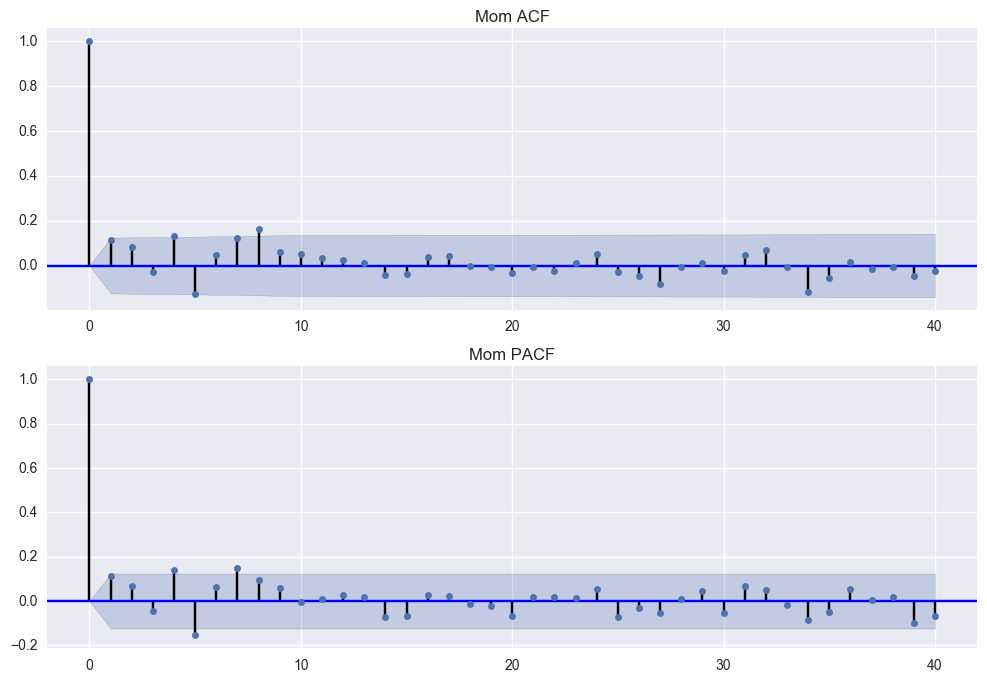

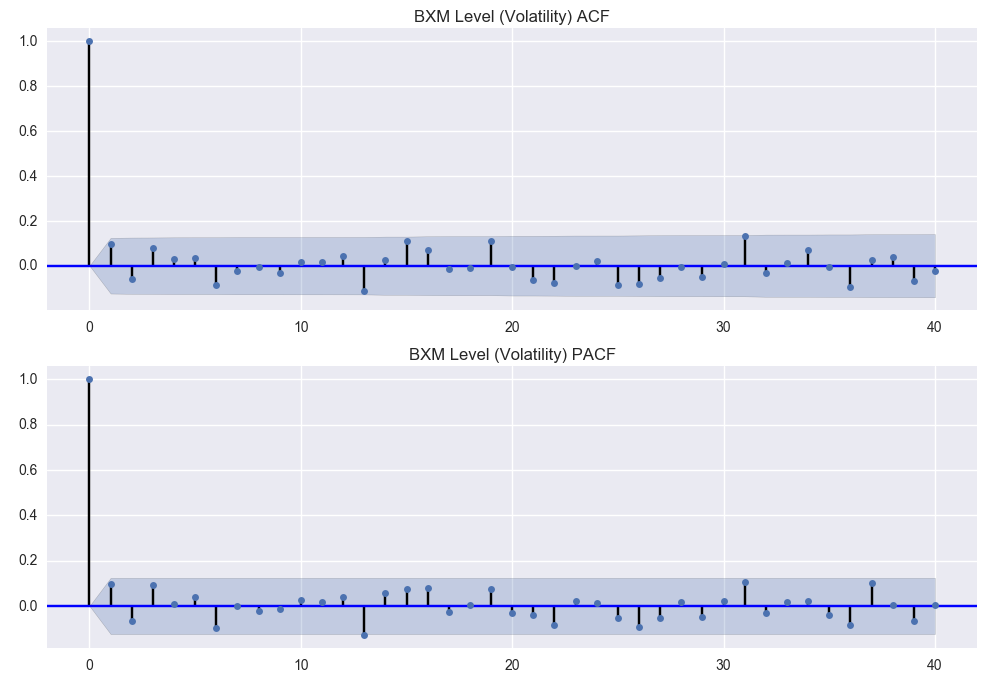

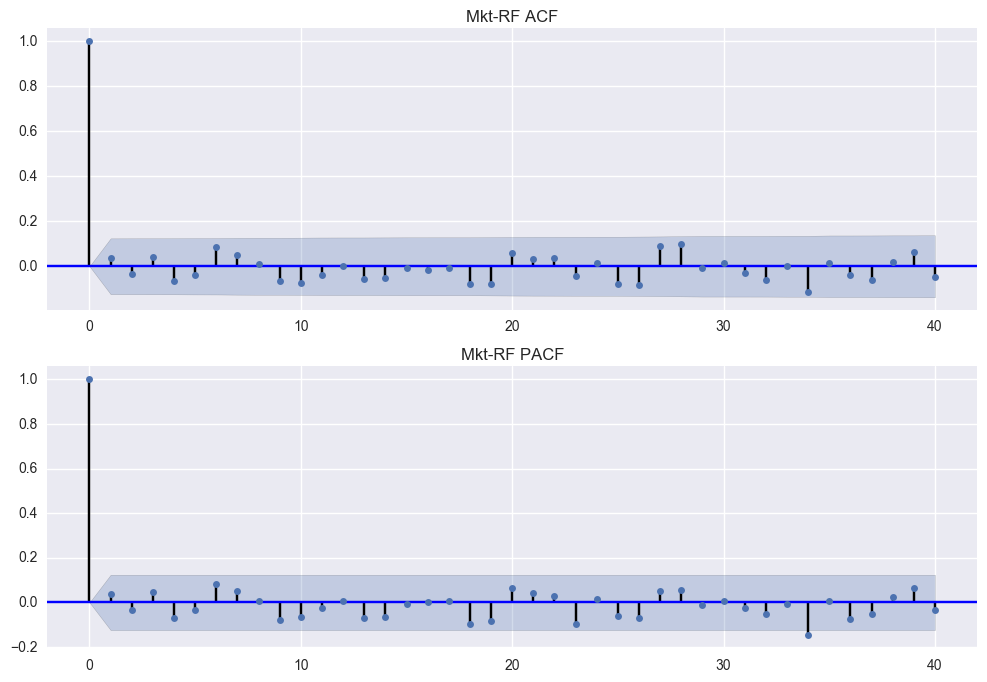

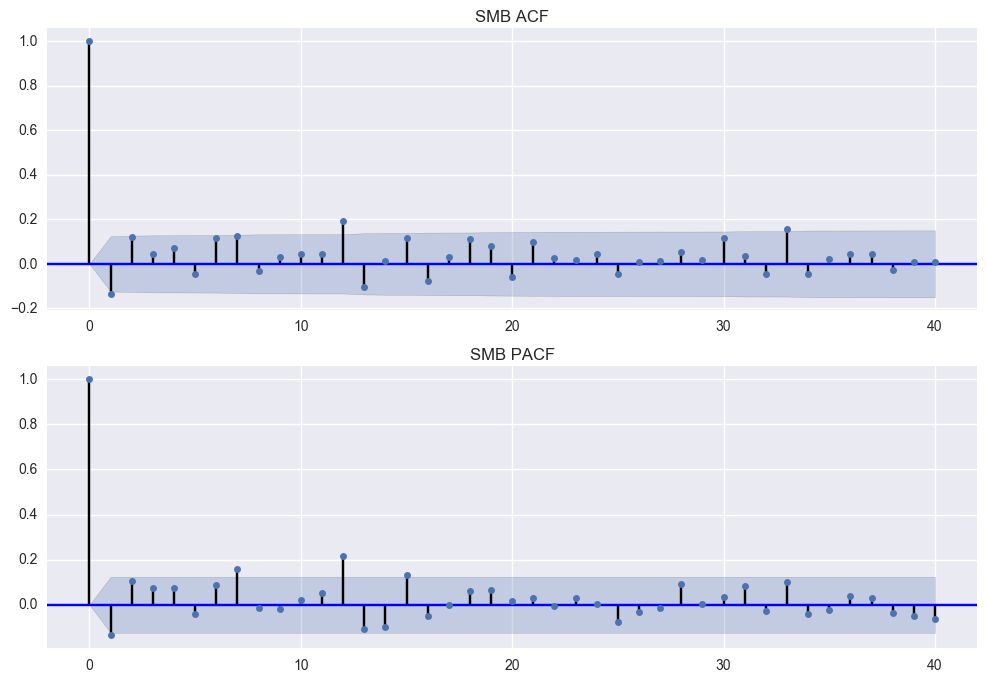

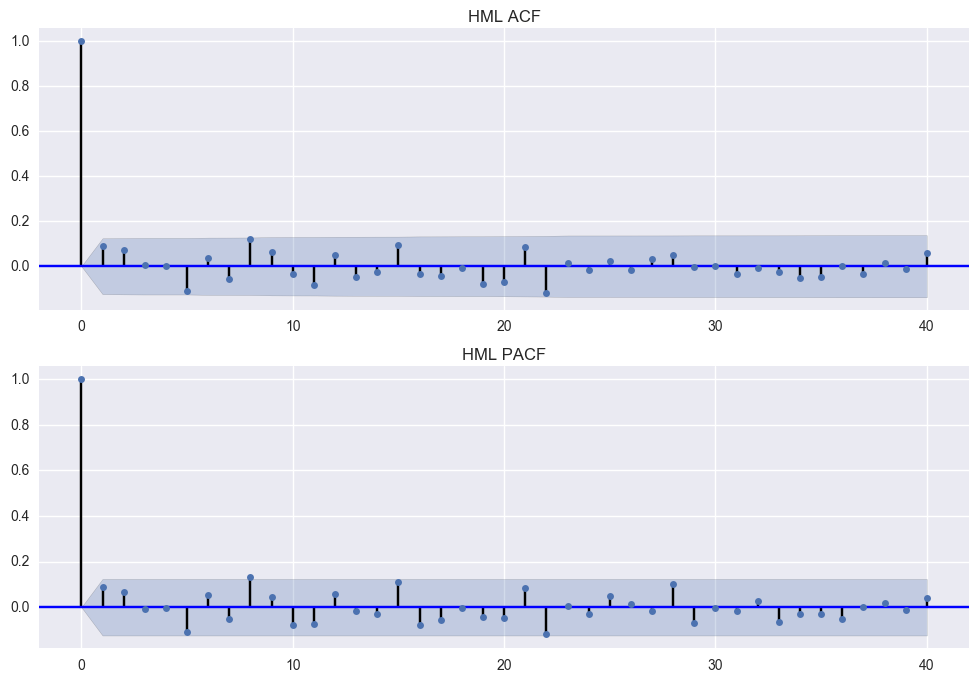

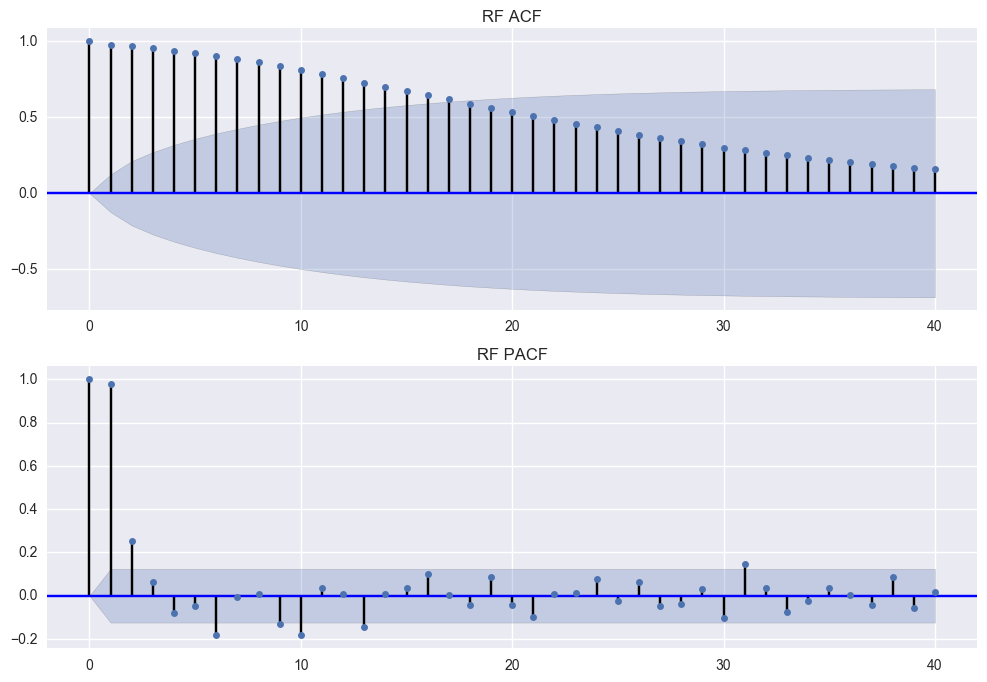

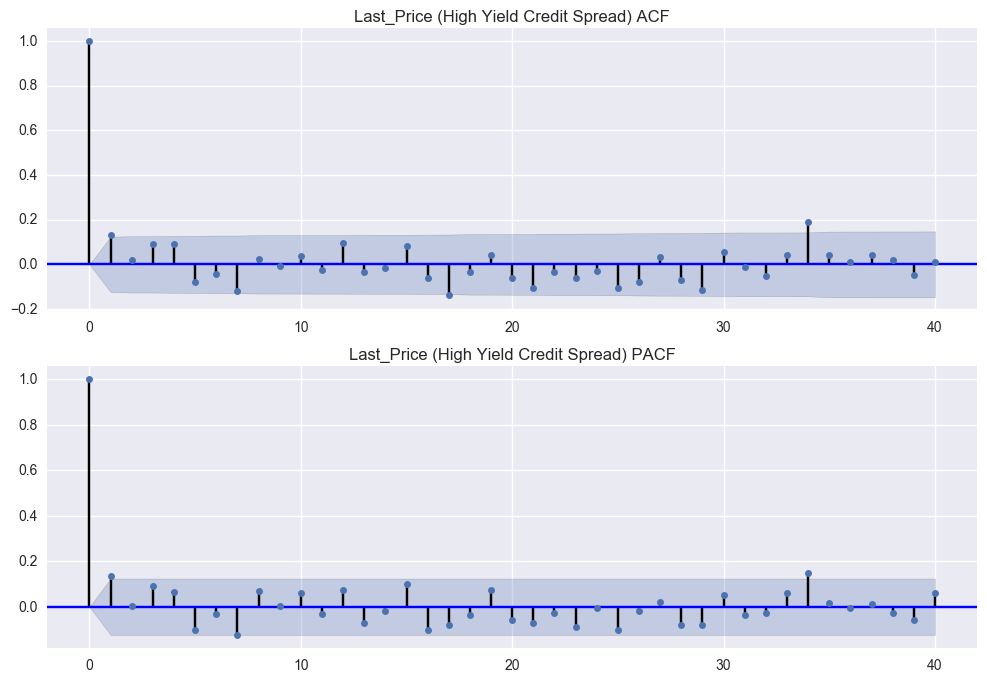

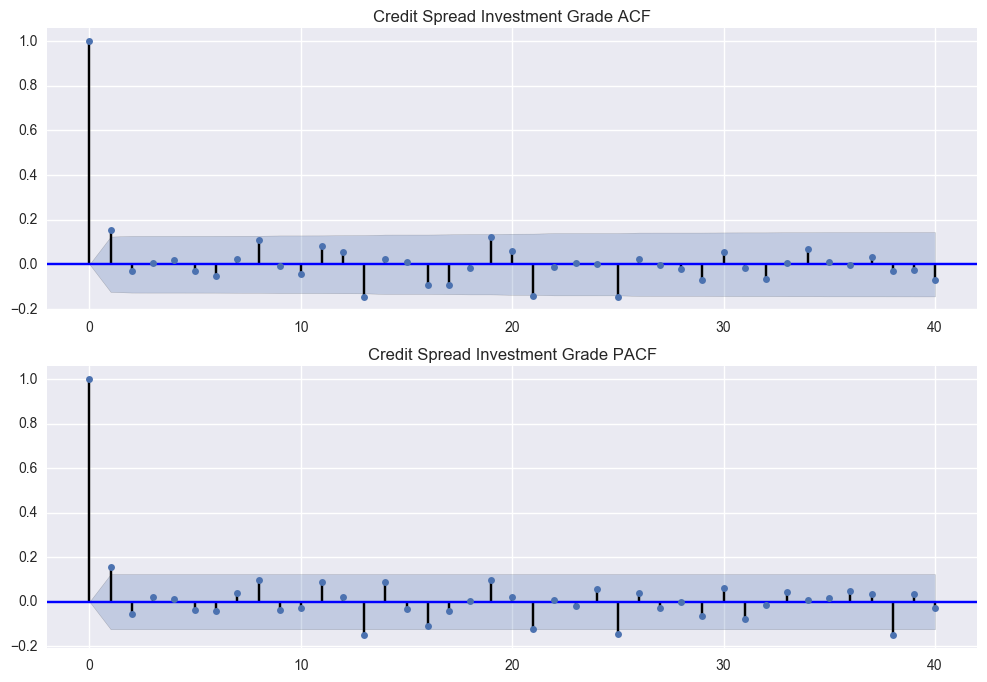

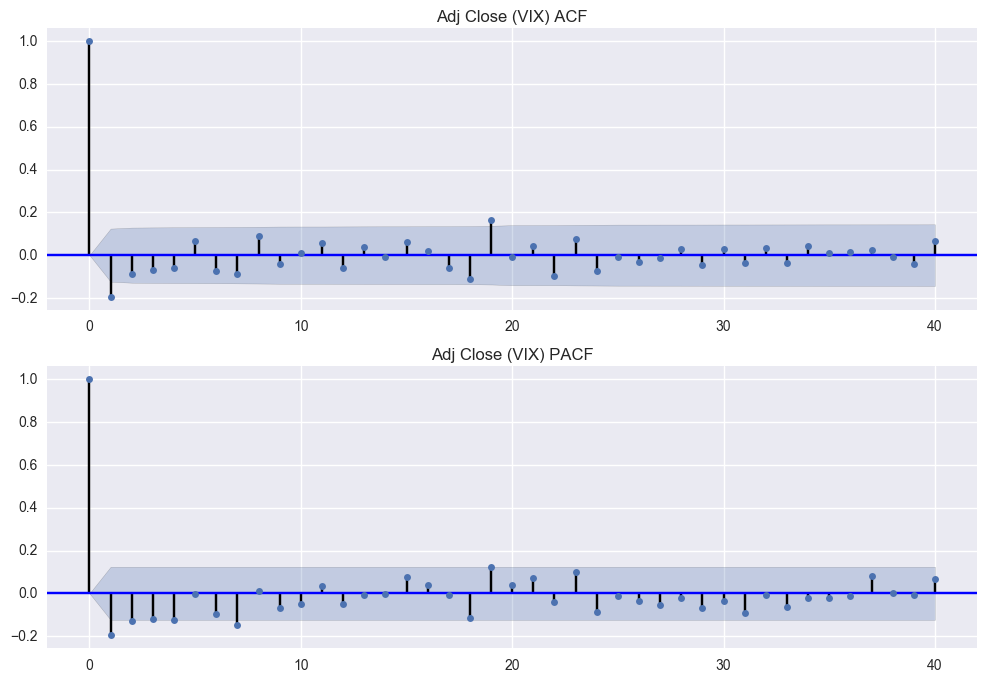

In [84]:
for col in df_new_mon.columns:
    plot_acf_pacf(df_new_mon, col)

In [85]:
def adf_mean_reversion(df, col):
    adf_results = ts.adfuller(df[col], 1)
    return adf_results[1], adf_results[4]['1%']

In [86]:
arr = [None] * len(df_new_mon.columns)
for i, col in enumerate(df_new_mon.columns):
    arr[i] = adf_mean_reversion(df_new_mon, col)  

df_new_mon_results = pd.DataFrame(arr, columns=['P-Value', '1% Level'], index=df_new_day.columns)
df_new_mon_results

,P-Value,1% Level
Mom,3.627015e-26,-3.456888
BXM Level (Volatility),1.442316e-26,-3.456888
Mkt-RF,7.239819e-28,-3.456888
SMB,5.234846e-19,-3.456996
HML,1.080886e-26,-3.456888
RF,6.242759e-01,-3.456996
Last_Price (High Yield Credit Spread),1.150955e-25,-3.456888
Credit Spread Investment Grade,2.557703e-25,-3.456888
Adj Close (VIX),7.703016e-26,-3.456996


## Plots with and without liquidity

In [91]:
df_new_mon_no_liq = Merge_Monthly_Factors(df_mom_new, df_vol_new, df_mkt_hml_smb_rf_new, 
                                   df_hy_credit_new, df_inv_grade_new, df_vix_new)

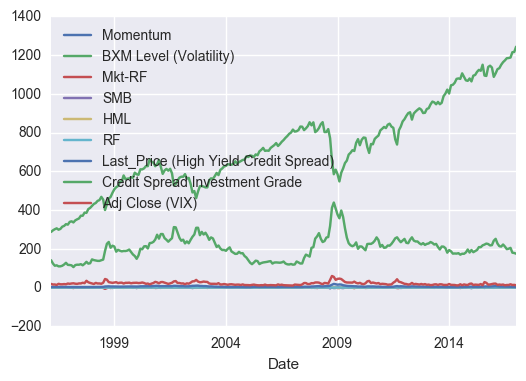

In [92]:
df_new_mon_no_liq.plot()

In [93]:
df_new_mon_no_liq_logs = Take_Log_Diff(df_new_mon_no_liq)

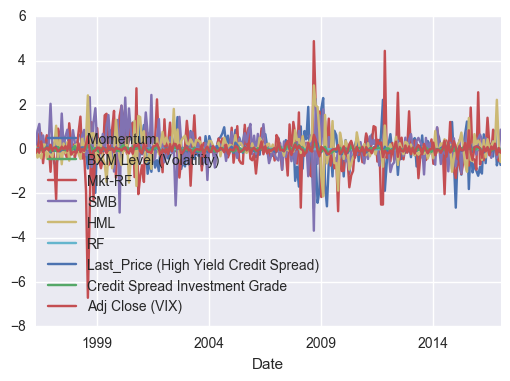

In [94]:
df_new_mon_no_liq_logs.plot()